In [2]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import random as r
import copy
import math
from math import pow
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from pprint import pprint
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv('air_bnb.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26


In [6]:
# remove data where price is 0
df = df.loc[df['price'] != 0]
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22547,29856708,Cozy Apartment right in the center of Berlin,87555909,Ulisses,Mitte,Brunnenstr. Süd,52.533865,13.400731,Entire home/apt,60,2,0,NaN,NaN,1,314
22548,29857108,Altbau/ Schöneberger Kiez / Schlafsofa,67537363,Jörg,Tempelhof - Schöneberg,Schöneberg-Nord,52.496211,13.341738,Shared room,20,1,0,NaN,NaN,6,78
22549,29864272,Artists loft with garden in the center of Berlin,3146923,Martin,Pankow,Prenzlauer Berg Südwest,52.531800,13.411999,Entire home/apt,85,3,0,NaN,NaN,2,15
22550,29866805,Room for two with private shower / WC,36961901,Arte Luise,Mitte,Alexanderplatz,52.520802,13.378688,Private room,99,1,0,NaN,NaN,3,6


In [7]:
# remove data where minimum_nights is more than 365 days
df.loc[df['minimum_nights'] <= 365]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22547,29856708,Cozy Apartment right in the center of Berlin,87555909,Ulisses,Mitte,Brunnenstr. Süd,52.533865,13.400731,Entire home/apt,60,2,0,NaN,NaN,1,314
22548,29857108,Altbau/ Schöneberger Kiez / Schlafsofa,67537363,Jörg,Tempelhof - Schöneberg,Schöneberg-Nord,52.496211,13.341738,Shared room,20,1,0,NaN,NaN,6,78
22549,29864272,Artists loft with garden in the center of Berlin,3146923,Martin,Pankow,Prenzlauer Berg Südwest,52.531800,13.411999,Entire home/apt,85,3,0,NaN,NaN,2,15
22550,29866805,Room for two with private shower / WC,36961901,Arte Luise,Mitte,Alexanderplatz,52.520802,13.378688,Private room,99,1,0,NaN,NaN,3,6


## Clustering

In [8]:
# Set feature for clustering
df_cluster = df[["room_type", "price", "minimum_nights"]]
df_cluster

,room_type,price,minimum_nights
0,Entire home/apt,60,4
1,Private room,17,2
2,Entire home/apt,90,62
3,Private room,26,5
4,Private room,42,2
...,...,...,...
22547,Entire home/apt,60,2
22548,Shared room,20,1
22549,Entire home/apt,85,3
22550,Private room,99,1


In [9]:
# Encode categorical variable
room_type = {"room_type": {"Shared room" : 0, "Private room": 1, "Entire home/apt": 2}}
df_cluster.replace(room_type, inplace=True)
df_cluster

C:\Anaconda\lib\site-packages\pandas\core\generic.py:6702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


,room_type,price,minimum_nights
0,2,60,4
1,1,17,2
2,2,90,62
3,1,26,5
4,1,42,2
...,...,...,...
22547,2,60,2
22548,0,20,1
22549,2,85,3
22550,1,99,1


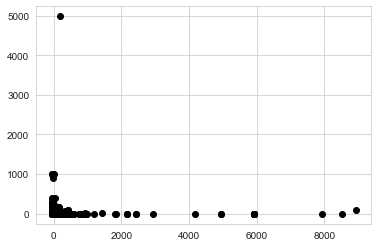

In [10]:
pca = PCA(n_components=len(df_cluster.iloc[0])).fit(df_cluster)
pca_2d = pca.transform(df_cluster)
plt.scatter(pca_2d[:,0],pca_2d[:,1], c='black')

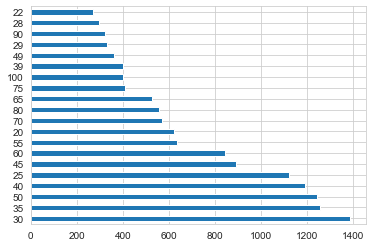

In [11]:
# plot distribution of value counts on 20 most common price
df_cluster['price'].value_counts()[:20].plot(kind='barh')

In [12]:
# divide the price column into 3 value 
df_cluster.loc[df_cluster['price'] <= 30, 'price'] = 0
df_cluster.loc[(df_cluster['price'] > 30) & (df_cluster['price'] < 60), 'price'] = 1
df_cluster.loc[(df_cluster['price'] >= 60), 'price'] = 2

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

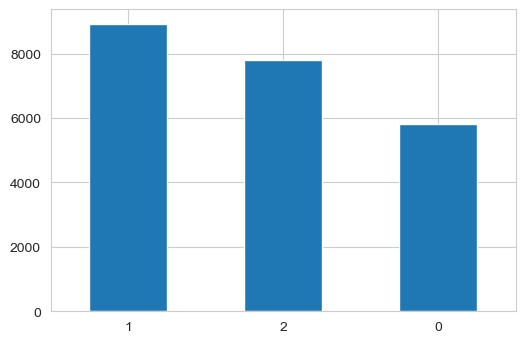

In [25]:
df_cluster['price'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)

In [14]:
# Change dataframe to array
X = df_cluster.values
X

array([[ 2,  2,  4],
       [ 1,  0,  2],
       [ 2,  2, 62],
       ...,
       [ 2,  2,  3],
       [ 1,  2,  1],
       [ 1,  1,  5]], dtype=int64)

In [15]:
# Standardize the data to have a mean of ~0 and a variance of 1
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X

array([[ 1.02557238,  1.18188664, -0.07766662],
       [-0.88190256, -1.40809658, -0.12684138],
       [ 1.02557238,  1.18188664,  1.34840127],
       ...,
       [ 1.02557238,  1.18188664, -0.102254  ],
       [-0.88190256,  1.18188664, -0.15142875],
       [-0.88190256, -0.11310497, -0.05307924]])

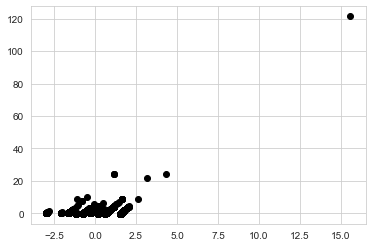

In [16]:
pca = PCA(n_components=len(X[0])).fit(X)
pca_2d = pca.transform(X)
plt.scatter(pca_2d[:,0],pca_2d[:,1], c='black')

In [17]:
# count euclidean distance between object and centroid
def euclidean_distance(x,center):
    return math.sqrt(sum([(a-b) **2 for a,b in zip(x, center)]))

In [18]:
# Apply K-Means Clustering to dataset
def KMeans(K):
    curr_centroid = [[0 for x in range(len(X[0]))] for y in range(K)]
    # Random K points from dataset
    for i in range(K):
        idx = r.randint(0,22551)
        for j in range(len(X[idx])):
            curr_centroid[i][j] = X[idx][j]
    
    prev_centroid = [None]
    while (prev_centroid != curr_centroid):    
        cluster = [0 for x in range(K)]
        c_result = [0 for x in range(len(X))]
        sum_c = [[0 for x in range(len(X[0]))] for y in range(K)]
        i_c = [0 for x in range(K)]

        temp = copy.deepcopy(prev_centroid)
        for i in range(len(X)):

            for j in range(K):
                cluster[j] = euclidean_distance(X[i], curr_centroid[j]) #find euclidean distance between object and centroid
            c_result[i] = cluster.index(min(cluster)) # get cluster result

            for j in range(K):
                if (c_result[i] == j):
                    i_c[j] += 1
                    for k in range(len(X[0])): 
                        sum_c[j][k] += X[i][k] # sum every object cluster result according to cluster result

        prev_centroid = copy.deepcopy(curr_centroid) # update previous centroid

        for j in range(K):
            if (i_c[j] != 0):
                for k in range(len(X[0])):
                    curr_centroid[j][k] = sum_c[j][k]/i_c[j] # update new centroid
    dist = [] 
    for i in range(len(X)):
        for j in range(K):
            if (c_result[i] == j):
                dist.append(euclidean_distance(X[i], curr_centroid[j])) # find euclidean distance between object and the last centroid 
    return c_result, dist, curr_centroid

In [19]:
# Count Sum of Squared Error (SSE)
SSE = []
for num_K in range(1,11): #count SSE for k=1 to k=11
    print("K = ", num_K)
    result, dist, centroids = KMeans(num_K)
    SSE.append(sum(pow(i, 2) for i in dist))
    print("SSE = ", SSE[num_K-1],"\n")

K =  1
SSE =  67632.00000000553 

K =  2
SSE =  38793.316043141 

K =  3
SSE =  31248.771780495164 

K =  4
SSE =  28561.502715701878 

K =  5
SSE =  21452.21862542129 

K =  6
SSE =  13900.835622243261 

K =  7
SSE =  20510.610786953832 

K =  8
SSE =  11306.708197614747 

K =  9
SSE =  3978.47760086099 

K =  10
SSE =  4978.904111524514 



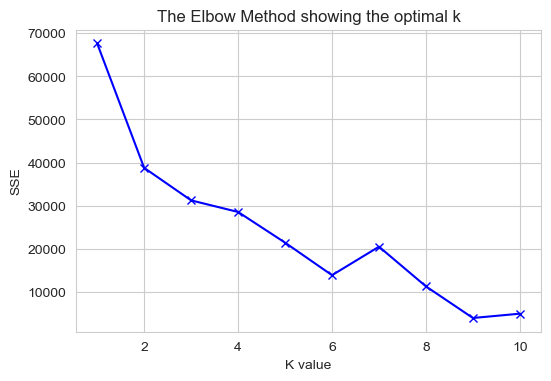

In [20]:
# plot SSE results of k=1 to k=10
K = range(1,11)
plt.rcParams['figure.dpi'] = 100
plt.plot(K, SSE, 'bx-')
plt.xlabel('K value')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [21]:
# find elbow from the SSE values
def findMinimum(SSE):
    delta = []
    for i in range(len(SSE)-1):
        delta.append(SSE[i]-SSE[i+1])
    return (delta.index(max(delta))+2)
idx = findMinimum(SSE)
print("Maximum K : ", idx)

# Apply maximum k to cluster dataset using k-means clustering
result, dist, centroid = KMeans(idx)

Maximum K :  2


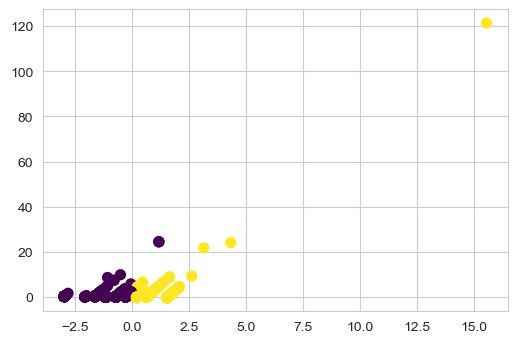

In [22]:
# Plot clustering result
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=result,
            s=50, cmap='viridis')

In [23]:
# Evaluate model using calinski-harabasz index
print("Calinski-harabasz index = %.3f" % metrics.calinski_harabasz_score(X, result))

Calinski-harabasz index = 16692.347


In [24]:
df_cluster.to_csv("dataset_clustering_model_2.csv", index=False)

## Classification

In [26]:
data_train = df[["price", "minimum_nights", "latitude", "longitude", "room_type", "availability_365"]]
data_train

,price,minimum_nights,latitude,longitude,room_type,availability_365
0,60,4,52.534537,13.402557,Entire home/apt,141
1,17,2,52.548513,13.404553,Private room,0
2,90,62,52.534996,13.417579,Entire home/apt,220
3,26,5,52.498855,13.349065,Private room,297
4,42,2,52.543157,13.415091,Private room,26
...,...,...,...,...,...,...
22547,60,2,52.533865,13.400731,Entire home/apt,314
22548,20,1,52.496211,13.341738,Shared room,78
22549,85,3,52.531800,13.411999,Entire home/apt,15
22550,99,1,52.520802,13.378688,Private room,6


In [27]:
data_test = df[['neighbourhood_group']]
data_test

,neighbourhood_group
0,Mitte
1,Pankow
2,Pankow
3,Tempelhof - Schöneberg
4,Pankow
...,...
22547,Mitte
22548,Tempelhof - Schöneberg
22549,Pankow
22550,Mitte


In [28]:
# Encode categorical ordinal label
room_type = {"room_type": {"Shared room" : 0, "Private room": 1, "Entire home/apt": 2}}
data_train.replace(room_type, inplace=True)
data_train

C:\Anaconda\lib\site-packages\pandas\core\generic.py:6702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


,price,minimum_nights,latitude,longitude,room_type,availability_365
0,60,4,52.534537,13.402557,2,141
1,17,2,52.548513,13.404553,1,0
2,90,62,52.534996,13.417579,2,220
3,26,5,52.498855,13.349065,1,297
4,42,2,52.543157,13.415091,1,26
...,...,...,...,...,...,...
22547,60,2,52.533865,13.400731,2,314
22548,20,1,52.496211,13.341738,0,78
22549,85,3,52.531800,13.411999,2,15
22550,99,1,52.520802,13.378688,1,6


In [29]:
# concate data train and data test
dataset = pd.concat([data_train, data_test.reindex(data_train.index)], axis=1)

In [30]:
# get values of data train
X = data_train.values
X

array([[ 60.        ,   4.        ,  52.53453732,  13.40255693,
          2.        , 141.        ],
       [ 17.        ,   2.        ,  52.54851279,  13.40455283,
          1.        ,   0.        ],
       [ 90.        ,  62.        ,  52.53499619,  13.41757867,
          2.        , 220.        ],
       ...,
       [ 85.        ,   3.        ,  52.53179977,  13.41199948,
          2.        ,  15.        ],
       [ 99.        ,   1.        ,  52.52080183,  13.37868779,
          1.        ,   6.        ],
       [ 45.        ,   5.        ,  52.47376159,  13.42444719,
          1.        ,  21.        ]])

In [31]:
# Standardize the data to have a mean of ~0 and a variance of 1
X = StandardScaler().fit_transform(X)
X

array([[-0.03253563, -0.07766662,  0.80168495, -0.06108848,  1.02557238,
         0.51230173],
       [-0.22772687, -0.12684138,  1.25508761, -0.02665409, -0.88190256,
        -0.66896259],
       [ 0.1036443 ,  1.34840127,  0.81657193,  0.19807499,  1.02557238,
         1.17414486],
       ...,
       [ 0.08094765, -0.102254  ,  0.71287107,  0.10181976,  1.02557238,
        -0.54329618],
       [ 0.14449828, -0.15142875,  0.35606779, -0.47289214, -0.88190256,
        -0.61869603],
       [-0.1006256 , -0.05307924, -1.17004687,  0.31657466, -0.88190256,
        -0.49302961]])

In [32]:
# get values of data train
y = data_test.values

In [33]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [34]:
# Set KNN as classifier and display current parameter
classifier =KNeighborsClassifier()
print('Parameters currently in use in {}:\n'.format('K-Nearest Neighbor'))
pprint(classifier.get_params())

Parameters currently in use in K-Nearest Neighbor:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


In [35]:
# Set hyperparameter for random search
random_grid = {'n_neighbors': [int(x) for x in np.linspace(start= 5, stop = 15, num = 10)],
                   'weights': ['uniform', 'distance'],
                   'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                   'leaf_size' : [30,40,50,60],
                   'p' : [1,2],
                   'metric' : ['euclidean', ',manhattan', 'minkowski','chebyshev']
              }
pprint(random_grid)

{'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
 'leaf_size': [30, 40, 50, 60],
 'metric': ['euclidean', ',manhattan', 'minkowski', 'chebyshev'],
 'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15],
 'p': [1, 2],
 'weights': ['uniform', 'distance']}


In [36]:
# Definition of the random search
random_search = RandomizedSearchCV(estimator=classifier,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConvers

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these par

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these par

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=50, n_jobs=None,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [30, 40, 50, 60],
                                        'metric': ['euclidean', ',manhattan',
                                                   'minkowski', 'chebyshev'],
                                        'n_neighbors': [5, 6, 7, 8, 9, 10, 11,
                

In [37]:
# Display best hyperparameter from random search
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'weights': 'distance', 'p': 1, 'n_neighbors': 9, 'metric': 'minkowski', 'leaf_size': 40, 'algorithm': 'auto'}

The mean accuracy of a model with these hyperparameters is:
0.9467689226664836


In [38]:
# Get best hyperparameter
best_classifier = random_search.best_estimator_

best_classifier

KNeighborsClassifier(algorithm='auto', leaf_size=40, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=1,
                     weights='distance')

In [39]:
# fit best estimator to data train
best_classifier.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=40, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=1,
                     weights='distance')

In [40]:
# Predict data using classifier and parameter from best_classifier
classifier_pred = best_classifier.predict(X_test)

In [41]:
# Display aqccuracy score
d = {
     'Model': 'K-Nearest Neighbor',
     'Training Set Accuracy': round(accuracy_score(y_train, best_classifier.predict(X_train)),2)*100,
     'Test Set Accuracy': round(accuracy_score(y_test, classifier_pred),2)*100
}

df_models = pd.DataFrame(d, index=[0])
df_models

,Model,Training Set Accuracy,Test Set Accuracy
0,K-Nearest Neighbor,100.0,95.0


In [42]:
dataset.to_csv('dataset_classification_model_2.csv', index=False)